# ÌöåÍ∑ÄÎ∂ÑÏÑù ÏùºÍ¥ÑÏ≤òÎ¶¨

sklearn Í∏∞Î∞ò ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù Î™®Ìòï Ï†ïÏùò Î∞è ÏÑ±Îä• ÌèâÍ∞ÄÏôÄ Í≤∞Í≥ºÎ≥¥Í≥†Î•º ÏàòÌñâÌïòÎäî Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÏûëÏÑ±ÌïòÍ∏∞

## #01. Ï§ÄÎπÑÏûëÏóÖ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

> start.py ÌååÏùºÏùÑ Ï†ïÏùòÌïú Í≤ΩÏö∞ ÏÉùÎûµ Í∞ÄÎä•Ìï®

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

from pandas import read_excel, DataFrame
from tabulate import tabulate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import t, f

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin = read_excel("C:/Users/Jihwan/Desktop/01Class/E.Ï∂îÎ°†ÌÜµÍ≥Ñ/E.InferentialStatistics/ÏàòÏóÖÏûêÎ£å/fish.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Í∏∏Ïù¥      56 non-null     float64
 1   ÎÜíÏù¥      56 non-null     float64
 2   ÎëêÍªò      56 non-null     float64
 3   Î¨¥Í≤å      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB
None


Í∏∏Ïù¥    ÎÜíÏù¥    ÎëêÍªò    Î¨¥Í≤å
0   8.4  2.11  1.41   5.9
1  13.7  3.53  2.00  32.0
2  15.0  3.82  2.43  40.0
3  16.2  4.59  2.63  51.5
4  17.4  4.59  2.94  70.0

## #02. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### [1] Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ

Ïïû ÏòàÏ†úÏóêÏÑú VIF Í∞íÏùÑ ÌôïÏù∏Ìïú Í≤∞Í≥º ÏöîÏù∏Îì§Í∞ÑÏùò Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ Í∞ïÌïòÍ≤å Î∞úÏÉùÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

Ïù¥ Í≤ΩÏö∞ ÏöîÏù∏Ïóê ÎåÄÌïú Ïä§ÏºÄÏùºÎßÅÏùÑ Ï†ÅÏö©ÌïòÎ©¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º ÏôÑÌôîÏãúÌÇ¨ Ïàò ÏûàÎã§.

In [4]:
scaler = StandardScaler()
df = DataFrame(scaler.fit_transform(origin), index=origin.index, columns=origin.columns)
df.head()

Í∏∏Ïù¥        ÎÜíÏù¥        ÎëêÍªò        Î¨¥Í≤å
0 -2.180225 -2.016507 -1.896175 -1.092422
1 -1.587434 -1.518703 -1.560774 -1.016660
2 -1.442032 -1.417039 -1.316328 -0.993438
3 -1.307815 -1.147103 -1.202633 -0.960056
4 -1.173599 -1.147103 -1.026405 -0.906355

In [18]:
yname = 'Î¨¥Í≤å'
x = df.drop('Î¨¥Í≤å', axis=1)
y = df[yname]
xnames = list(x.columns)
print(y)

0    -1.092422
1    -1.016660
2    -0.993438
3    -0.960056
4    -0.906355
5    -0.819272
6    -0.883133
7    -0.877327
8    -0.862814
9    -0.862814
10   -0.790245
11   -0.775731
12   -0.746703
13   -0.732189
14   -0.761217
15   -0.761217
16   -0.732189
17   -0.717676
18   -0.790245
19   -0.732189
20   -0.674134
21   -0.688648
22   -0.674134
23   -0.616079
24   -0.456428
25   -0.688648
26   -0.563830
27   -0.587052
28   -0.537705
29   -0.476747
30   -0.238721
31   -0.354831
32   -0.340317
33   -0.383859
34   -0.383859
35   -0.238721
36   -0.180666
37    0.382469
38    0.504385
39    1.328768
40    0.878841
41    0.922382
42    0.922382
43    0.893355
44    1.502934
45    0.777244
46    1.270713
47    1.357796
48    1.502934
49    1.836751
50    1.270713
51    2.083485
52    1.793210
53    2.083485
54    1.793210
55    1.793210
Name: Î¨¥Í≤å, dtype: float64


## #03. ÏÑ†ÌòïÌöåÍ∑ÄÎ•º ÏúÑÌïú ÏùºÍ¥Ñ Ï≤òÎ¶¨ ÏΩîÎìú Íµ¨ÌòÑ

ÌõàÎ†®Í≤∞Í≥º ÏãúÍ∞ÅÌôî


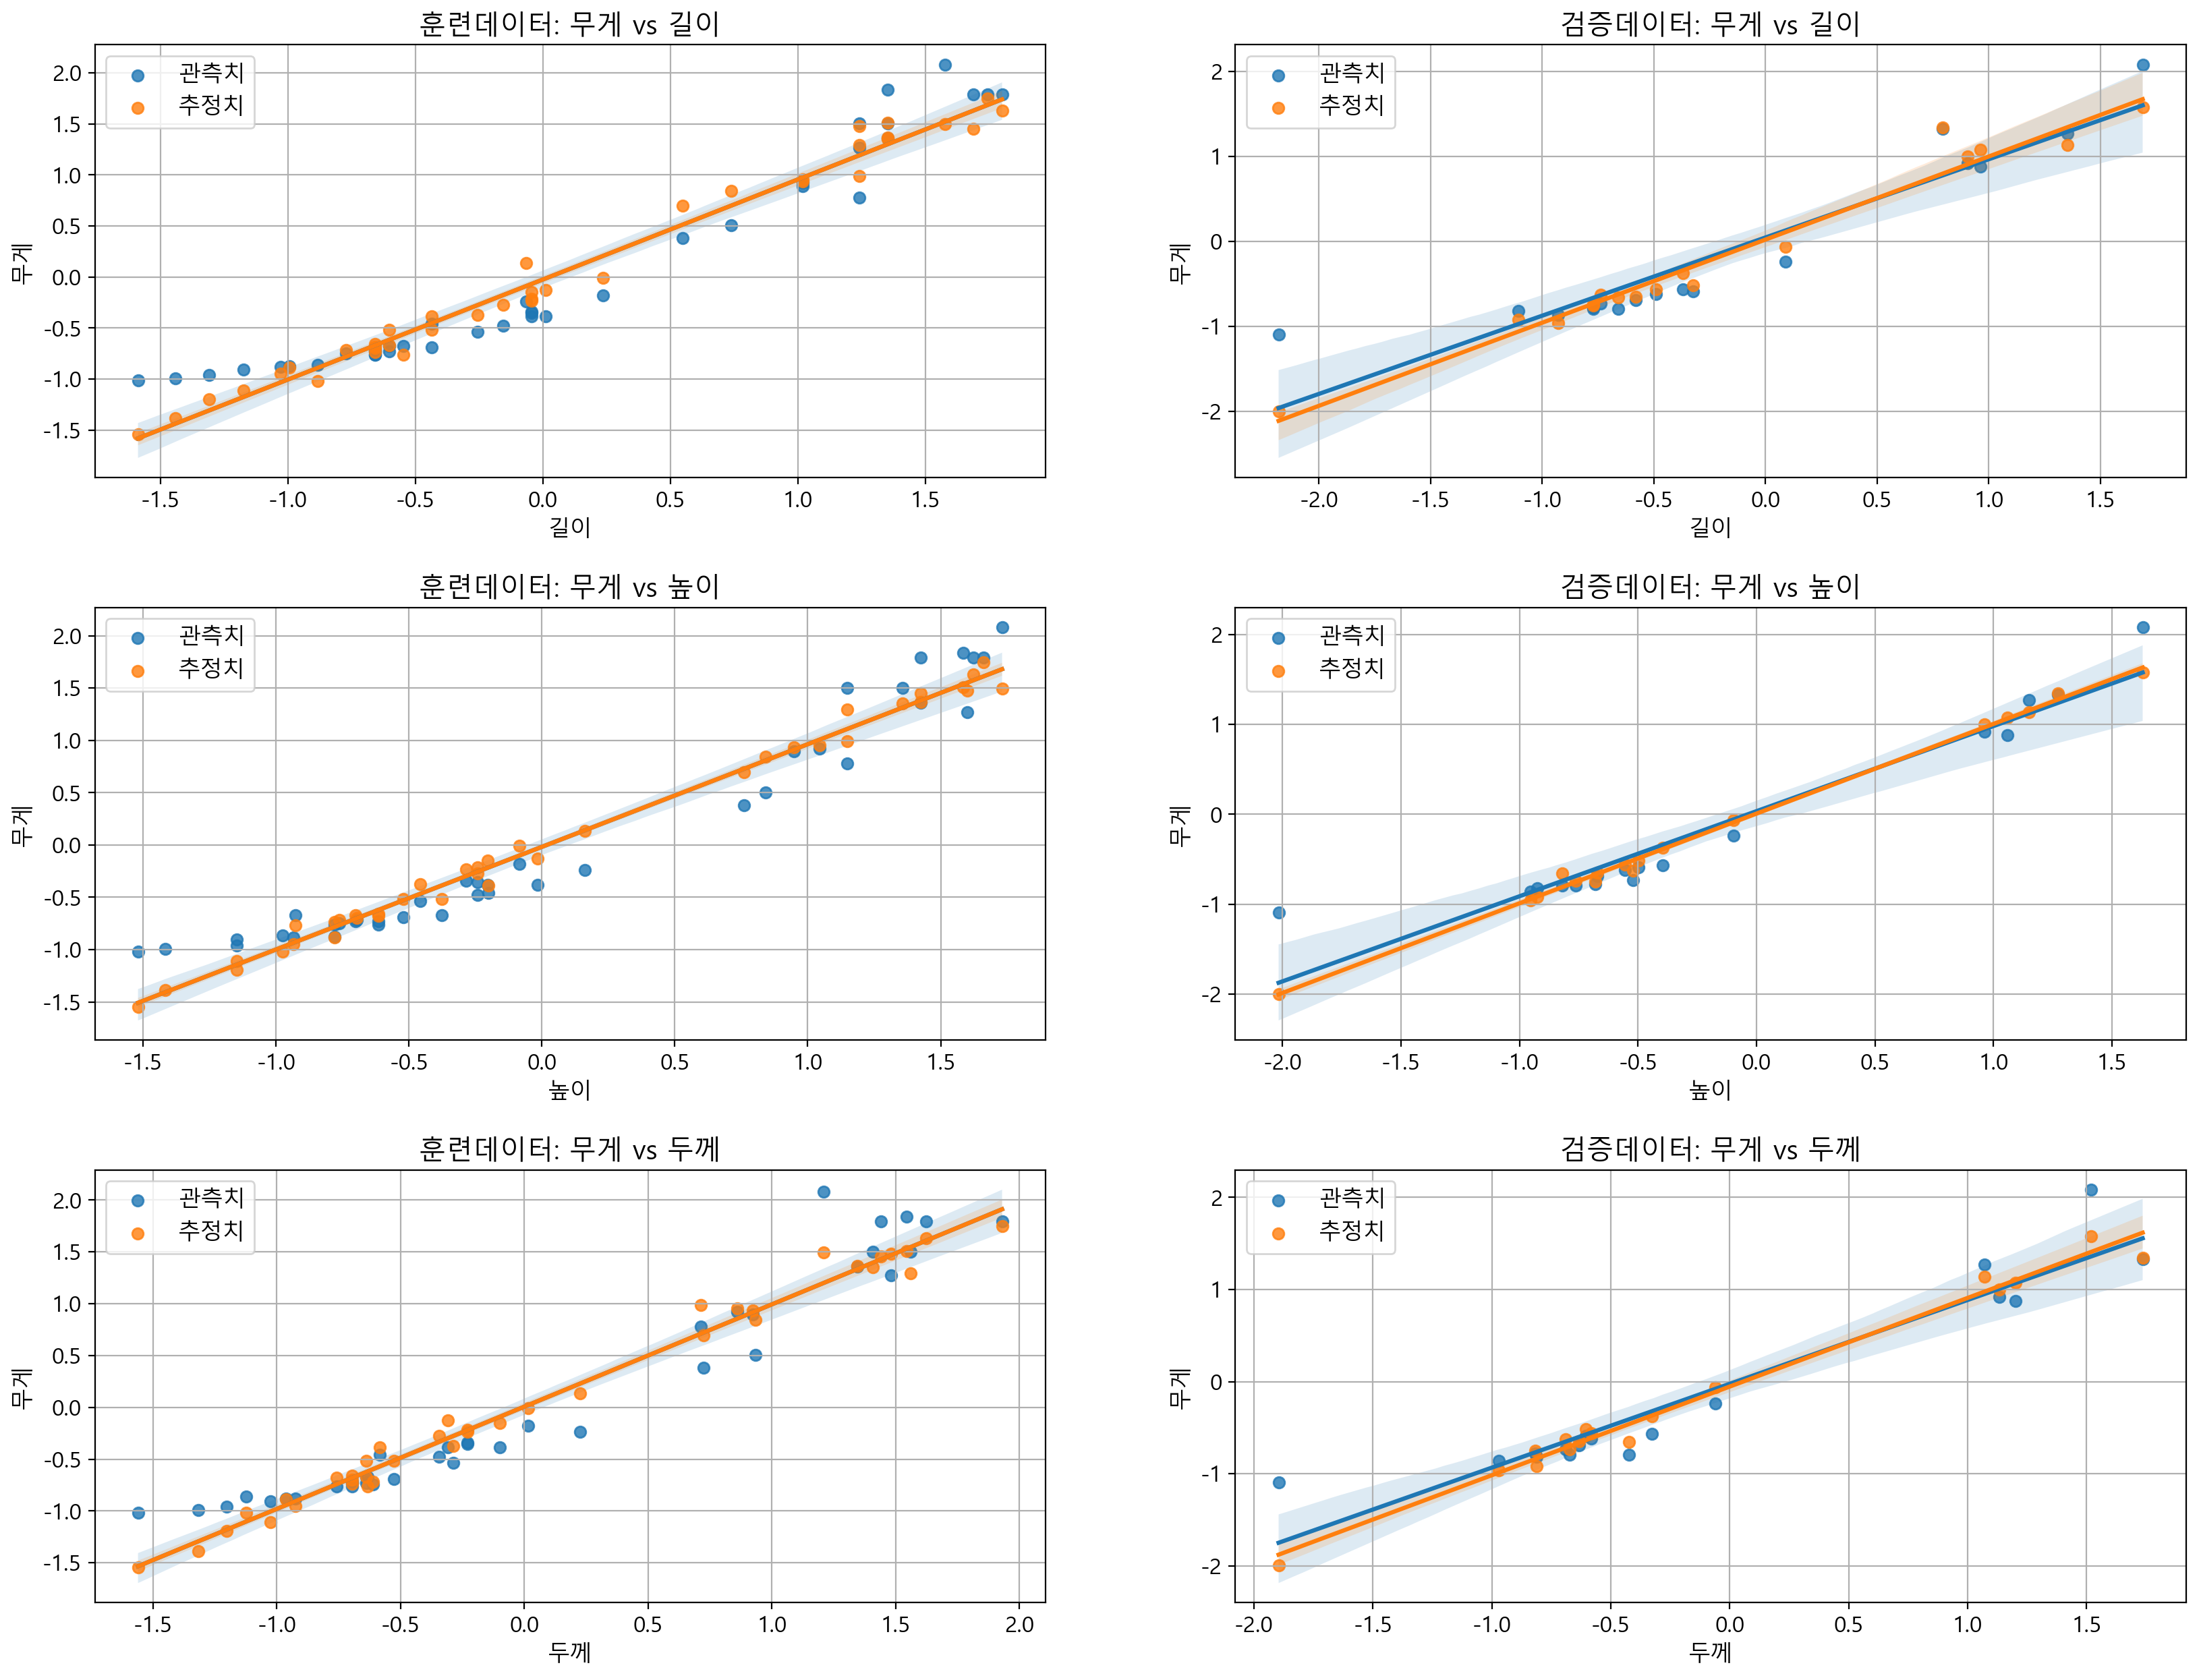

[ÏÑ±Îä•ÏßÄÌëú]
+-------------------------------+--------------+--------------+
|                               |   ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |   Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |
|-------------------------------+--------------+--------------|
| Í≤∞Ï†ïÍ≥ÑÏàò(R2)                  |     0.949944 |     0.919246 |
| ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)             |      0.17963 |     0.169193 |
| ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)             |    0.0513092 |    0.0743921 |
| ÌèâÍ∑†Ïò§Ï∞®(RMSE)                |     0.226515 |     0.272749 |
| ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |      28.4108 |      20.4653 |
| ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)           |      8.90046 |      4.23781 |
+-------------------------------+--------------+--------------+

ÌöåÍ∑ÄÏãù
Î¨¥Í≤å = 0.160 * Í∏∏Ïù¥ + 0.474 * ÎÜíÏù¥ + 0.359 * ÎëêÍªò + -0.011

[ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ≥¥Í≥†]
+----+------------+------------+--------------------+------------+------------------+-------+------------+---------+
|    | Ï¢ÖÏÜçÎ≥ÄÏàò   | ÎèÖÎ¶ΩÎ≥ÄÏàò   |   B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏ

ValueError: array length 17 does not match index length 56

In [19]:
# --------------------------------------
# 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# --------------------------------------
yname = 'Î¨¥Í≤å'
x = df.drop('Î¨¥Í≤å', axis=1)
y = df[yname]
xnames = list(x.columns)
#print(xnames)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# --------------------------------------
# 2. ÌöåÍ∑ÄÎ∂ÑÏÑù
# --------------------------------------
# Î∂ÑÏÑù Î™®Îç∏ ÏÉùÏÑ±
model = LinearRegression(n_jobs=-1)
fit = model.fit(x_train, y_train)
#fit

# --------------------------------------
# 3. ÌõàÎ†®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Ïπò
# --------------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
#print(y_train_pred.shape, y_test_pred.shape)

# --------------------------------------
# 4. ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä•ÏßÄÌëú Í≥ÑÏÇ∞
# --------------------------------------
# Î∞òÎ≥µ ÏàòÌñâÏùÑ ÏúÑÌï¥ ÌõàÎ†®/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Î¨∂Ïùå
target = [[x_train, y_train, y_train_pred],[x_test, y_test, y_test_pred]]

# ÏÑ±Îä•ÏßÄÌëú Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
result_data = []

# ÏãúÍ∞ÅÌôî ÏãúÏûë
print('ÌõàÎ†®Í≤∞Í≥º ÏãúÍ∞ÅÌôî')
size = len(xnames)

fig, ax = plt.subplots(len(xnames),2,figsize=(20,5*size),dpi=200)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    # v[0] -> x, v[1] -> y, v[2] -> pred
    result = {
        'Í≤∞Ï†ïÍ≥ÑÏàò(R2)': r2_score(v[1], v[2]),
        "ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE)": mean_absolute_error(v[1], v[2]),
        "ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)": mean_squared_error(v[1], v[2]),
        "ÌèâÍ∑†Ïò§Ï∞®(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }

    result_data.append(result)

    # ÏÑúÎ∏åÌîåÎ°ØÏóêÏÑú Î∞îÍπ•Ïùò Î∞òÎ≥µÎ¨∏Ïù¥ Ïó¥ÏùÑ Îã¥ÎãπÌïòÎèÑÎ°ù Íµ¨ÏÑ±ÌïòÏòÄÏúºÎØÄÎ°ú, ÎÇ¥Î∂Ä Î∞òÎ≥µÎ¨∏ÏùÄ Ìñâ(Î≥ÄÏàò Ï¢ÖÎ•òÎ≥Ñ)ÏùÑ Îã¥Îãπ

    for j,w in enumerate(xnames):
        sb.regplot(x=v[0][w], y = v[1], ci=95, ax = ax[j][i], label='Í¥ÄÏ∏°Ïπò')
        sb.regplot(x=v[0][w], y = v[2], ci=95, ax = ax[j][i], label='Ï∂îÏ†ïÏπò')
        ax[j][i].set_title(f'ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: {yname} vs {w}' if i == 0 else f'Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞: {yname} vs {w}')
        ax[j][i].grid(True)
        ax[j][i].legend()

plt.show()
plt.close()

result_df = DataFrame(result_data, index = ['ÌõàÎ†®Îç∞Ïù¥ÌÑ∞', 'Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞']) 
print('[ÏÑ±Îä•ÏßÄÌëú]')
print(tabulate(result_df.T, headers='keys', tablefmt='psql',
                      showindex=True, numalign='right'), end='\n\n')


# --------------------------------------
# 5. ÌöåÍ∑ÄÏãù ÎèÑÏ∂ú
# --------------------------------------
expr = '{yname} = '.format(yname=yname)

for i, v in enumerate(xnames):
    expr += '%0.3f * %s + ' % (fit.coef_[i], v)

expr += '%0.3f' % fit.intercept_
print('ÌöåÍ∑ÄÏãù')
print(expr, end='\n\n')


# --------------------------------------
# 6. Í≤∞Í≥ºÎ≥¥Í≥†
# --------------------------------------

for i, v in enumerate(target):
    print('[ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê' if i == 0 else '[Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïóê', 'ÎåÄÌïú Í≤∞Í≥ºÎ≥¥Í≥†]')

    target_x = v[0]
    target_y = v[1]
    target_y_pred = v[2]

    # ÏûîÏ∞®
    resid = target_y - target_y_pred

    # Ï†àÌé∏Í≥º Í≥ÑÏàòÎ•º ÌïòÎÇòÏùò Î∞∞Ïó¥Î°ú Í≤∞Ìï©
    params = np.append(fit.intercept_,fit.coef_)

    # Í≤ÄÏ¶ùÏö© ÎèÖÎ¶ΩÎ≥ÄÏàòÏóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
    design_x = target_x.copy()
    design_x.insert(0, 'ÏÉÅÏàò', 1)

    dot = np.dot(design_x.T, design_x)
    inv = np.linalg.inv(dot)
    dia = inv.diagonal()

        # Ï†úÍ≥±Ïò§Ï∞®
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # ÌëúÏ§ÄÏò§Ï∞®
    ts_b = params / se_b                # tÍ∞í

# Í∞Å ÎèÖÎ¶ΩÏàòÏóê ÎåÄÌïú pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for i, v in enumerate(target_x.columns)]

    # ÌëúÏ§ÄÌôî Í≥ÑÏàò
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression(n_jobs=-1)
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # Í≤∞Í≥ºÌëú Íµ¨ÏÑ±ÌïòÍ∏∞
    result_df = DataFrame({
        "Ï¢ÖÏÜçÎ≥ÄÏàò": [yname] * len(xnames),
        "ÎèÖÎ¶ΩÎ≥ÄÏàò": xnames,
        "B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(params[1:], 4),
        "ÌëúÏ§ÄÏò§Ï∞®": np.round(se_b[1:], 3),
        "Œ≤(ÌëúÏ§ÄÌôî Í≥ÑÏàò)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "Ïú†ÏùòÌôïÎ•†": np.round(p_values[1:], 3),
        "VIF": vif,
    })

#result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    resid = target_y - target_y_pred        # ÏûîÏ∞®
    dw = durbin_watson(resid)               # ÎçîÎπà ÏôìÏä® ÌÜµÍ≥ÑÎüâ
    r2 = r2_score(target_y, target_y_pred)  # Í≤∞Ï†ïÍ≥ÑÏàò(ÏÑ§Î™ÖÎ†•)
    rowcount = len(target_x)                # ÌëúÎ≥∏Ïàò
    featurecount = len(target_x.columns)    # ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò

    # Î≥¥Ï†ïÎêú Í≤∞Ï†ïÍ≥ÑÏàò
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # fÍ∞í
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = "ùëÖ^2(%.3f), Adj.ùëÖ^2(%.3f), F(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
    print(tpl % (r2, adj_r2, f_statistic, p, dw), end="\n\n")

    # Í≤∞Í≥ºÎ≥¥Í≥†
    tpl = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %0.3f, p %s 0.05)."

    print(tpl % (
        yname,
        ",".join(xnames),
        "Ïú†ÏùòÌïòÎã§" if p <= 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§",
        len(target_x.columns),
        len(target_x.index)-len(target_x.columns)-1,
        f_statistic,
        "<=" if p <= 0.05 else ">"), end="\n\n")

    # ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
    for n in xnames:
        item = result_df[result_df['ÎèÖÎ¶ΩÎ≥ÄÏàò'] == n]
        coef = item['B(ÎπÑÌëúÏ§ÄÌôî Í≥ÑÏàò)'].values[0]
        pvalue = item['Ïú†ÏùòÌôïÎ•†'].values[0]

        s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %0.3f(p %s 0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
        k = s % (n,
                coef,
                "<=" if pvalue <= 0.05 else '>',
                yname,
                'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if pvalue <= 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§'
        )

        print(k)

    print("")